# Title : Classify X-Ray Medical Images from Different Body Sections

## Part 1 - Data Compilation

The images were downloaded from three different URL and the dataset consists of 4331 x-ray images.

* Chest images were downloaded from https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia. 2366 images were randomly taken from the two directories.

* Knee images were downloaded from https://data.mendeley.com/datasets/t9ndx37v5h/1. 1124 images were randomly taken from the two directories.

* Shoulder images were downloaded from https://www.kaggle.com/dryari5/shoulder-xray-classification. The dataset is organized into 3 folders (train, test, val) and contains subfolders for each image category (Type A1, C1, D1 and Others). There are 841 Shoulder X-Ray images (PNG) and 4 categories (Type A1, C1, D1 and Others).


### Importing the necessary packages 
(Moreno-Garcia 2022)

In [204]:
# Ignore warnings
import warnings; warnings.simplefilter('ignore')
## Importing packages
import numpy as np
import pandas as pd
import seaborn as sns
import os
import random
import cv2
import csv
from skimage import feature
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

### The following code can be used to load the dataset, resize the images, and then create an additional image repository using Histogram of Gradients (HOG).
(Moreno-Garcia 2022)

1. To extract HOG features, defining a class

In [205]:
class HOG:
    def __init__(self, orientations = 9, pixelsPerCell = (8, 8),
        cellsPerBlock = (3, 3), transform = False):
        # Count the number of orientations, pixels per cell, and cells per block, as well as whether or not to use power law compression.
        self.orienations = orientations
        self.pixelsPerCell = pixelsPerCell
        self.cellsPerBlock = cellsPerBlock
        self.transform = transform

    def describe(self, image):
        # compute the image's HOG
        hist = feature.hog(image, orientations = self.orienations,
            pixels_per_cell = self.pixelsPerCell,
            cells_per_block = self.cellsPerBlock,
            transform_sqrt = self.transform)
        ## return HOG features
        return hist
    
hog = HOG(orientations = 18, pixelsPerCell = (10, 10), cellsPerBlock = (1, 1), transform = True)

2. Loading images (original repo) & extract HOG features (feature repo)
(Moreno-Garcia 2022)

In [206]:
bin_thresh = 180 #binarisation threshold
resize_factor = 100 # for both height and width
path = 'Images'
datarepo = [] # List to append the images as 2D numpy arrays
originalrepo = [] # Creating repository for flattened pixels
hogrepo = [] # Create list to append the HOG features
target = [] # List to append the target/class/label 
print('\nLoading images...')
for root, dirs, files in os.walk(path):
     for file in files:
        with open(os.path.join(root, file), "r") as auto:
            try:
                img = cv2.imread(root+'/'+file, 0)
                img = cv2.resize(img, (resize_factor, resize_factor)) 
                datarepo.append(img)
                originalrepo.append(img.flatten())
                _, img_bin = cv2.threshold(img, bin_thresh, 255, 0) 
                # Extracting HOG and appending to HOG repo
                hogfeatures = hog.describe(img)
                hogrepo.append(hogfeatures)
                # Append the folder with image to target list
                target.append(root.replace(path,'').replace('\\','').replace('/',''))
            except Exception as e:
                print("Invalid file "+file+" skipped.")
            
# Converting repo lists into numpy arrays
originalrepo = np.array(originalrepo)
hogrepo = np.array(hogrepo)



Loading images...


In [207]:
#change target labels into numbers 
for i in range(len(target)):
    if target[i] == "chest": 
        target[i] = 0
    elif target[i] == "knee":
        target[i] = 1
    elif target[i] == "shoulder":
        target[i] = 2

3. Calculate the distribution and showing repos
(Moreno-Garcia 2022)


Calculating class distribution...
   Class  Number of Samples
0      0               2366
1      1               1124
2      2                841
Total images: 4331

Showing class distribution bar chart...


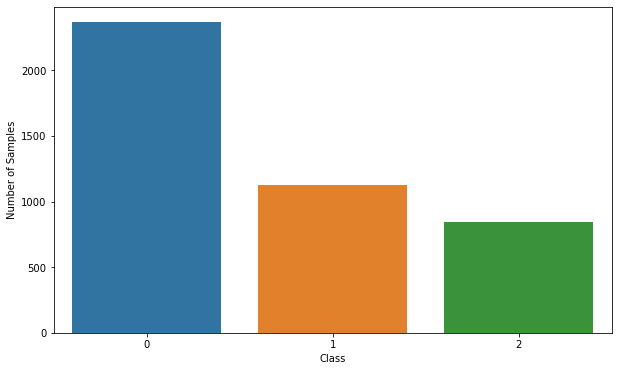

Size of target:  4331
Size of original repository:  (4331, 10000)
Example of the original repository: 
[[21 30 32 ... 15 15 15]
 [69 75 87 ...  0  0  0]
 [27 28 24 ...  0  0  0]
 ...
 [59 50 23 ... 19 19 19]
 [19 19 19 ... 19 19 19]
 [19 19 19 ... 19 19 19]]
Size of HOG features data structure:  (4331, 1800)
Example of the HOG repository: 
[[0.3327321  0.21350279 0.1456348  ... 0.08552307 0.43586649 0.55798045]
 [0.32806715 0.21161229 0.08373893 ... 0.07311814 0.38318681 0.64049676]
 [0.30411734 0.19221241 0.1304004  ... 0.35924736 0.46624681 0.46624681]
 ...
 [0.52571089 0.         0.         ... 0.         0.         0.        ]
 [0.06022886 0.         0.02381978 ... 0.         0.         0.        ]
 [0.         0.         0.02338299 ... 0.         0.         0.        ]]


In [208]:
print('\nCalculating class distribution...')
histo = [['Class','Number of Samples']]
for i, label1 in enumerate(sorted(list(set(target)))):
    cont = 0
    for j, label2 in enumerate(target):
        if label1 == label2:
            cont+=1
    histo.append([label1,cont])
histo.append(['Total Samples', len(target)])
## Save histogram as a .csv file   
with open('classdistribution.csv', 'w', newline='', encoding='utf-8') as csvfile:
    filewriter = csv.writer(csvfile, delimiter=',')
    for i, hist in enumerate(histo):
        filewriter.writerow(hist)
## Load as a panda
histo_panda = pd.DataFrame.from_records(histo[1:-1], columns=histo[0])
print(histo_panda)
print('Total images: '+str(len(target)))
## Create a histogram using seaborn
sns_plot = sns.barplot(y="Number of Samples", x="Class", data=histo_panda)
## Saving the image
sns_plot.figure.set_size_inches(10,6)
sns_plot.figure.savefig('barchart.jpg', orientation = 'landscape', dpi = 600, transparent=True)
print('\nShowing class distribution bar chart...')
plt.show()
print('Size of target: ', len(target))
print('Size of original repository: ', originalrepo.shape)
print('Example of the original repository: ')
print(originalrepo)
print('Size of HOG features data structure: ', hogrepo.shape)
print('Example of the HOG repository: ')
print(hogrepo)

4. Saving the datasets as csv files
(Moreno-Garcia 2022)

In [209]:
print('\nSaving datasets as .csv files...')   

with open('original.csv', 'w', newline='', encoding='utf-8') as csvfile:
    filewriter = csv.writer(csvfile, delimiter=',')
    for i, pix in enumerate(originalrepo):
        row = np.concatenate((pix,[target[i]]))
        filewriter.writerow(row)

with open('hog.csv', 'w', newline='', encoding='utf-8') as csvfile:
    filewriter = csv.writer(csvfile, delimiter=',')
    for i, h in enumerate(hogrepo):
        row = np.concatenate((h,[target[i]]))
        filewriter.writerow(row)

print('\nData saved into .csv files!')  


Saving datasets as .csv files...

Data saved into .csv files!


### Displaying samples of data
(Moreno-Garcia 2022)

#### Chest

Chest Images


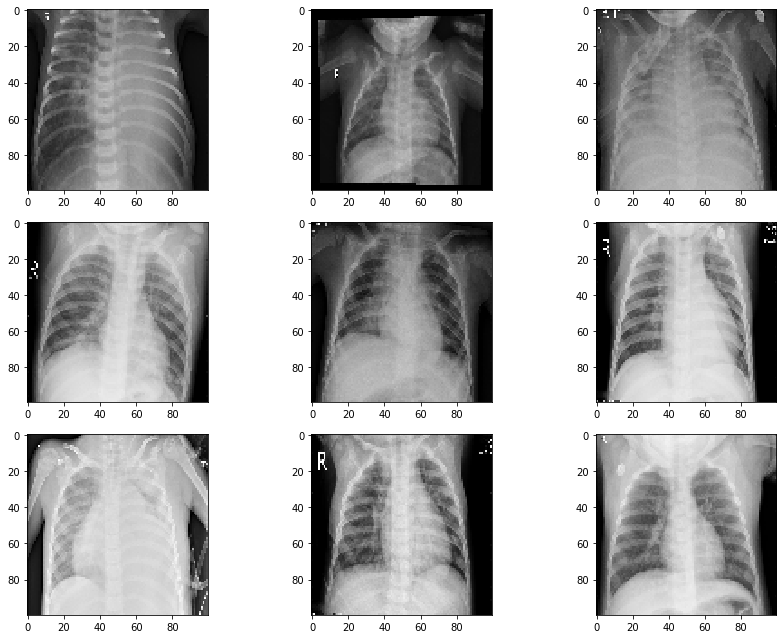

In [210]:
chestrepo = originalrepo[np.asarray(target) == 0]
symbols_visualise = random.sample(range(len(chestrepo)), 9)
fig,axes = plt.subplots(3,3, figsize=[12,9])
fig.tight_layout() # increase the distance between subplots
for i, dat in enumerate(axes.flatten()):
    if i<len(symbols_visualise): # This "if" is included to prevent the programme from crashing due to a lack of data to plot if the user requests more subplots than data.
        dat.imshow(np.asarray(chestrepo[symbols_visualise[i]]).reshape(100,100), 
                   cmap='gray', interpolation='nearest')
print('Chest Images')
plt.show()

#### Knee

Knee Images


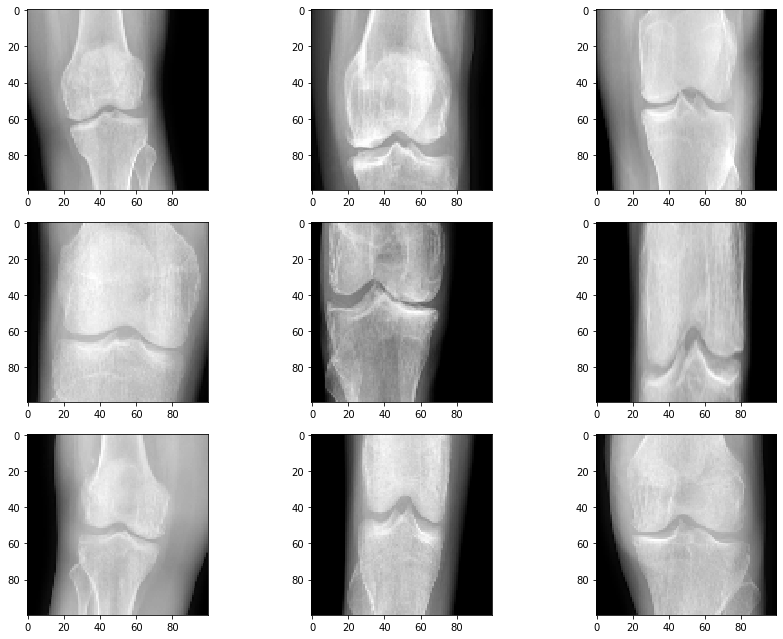

In [211]:
kneerepo = originalrepo[np.asarray(target) == 1]
symbols_visualise = random.sample(range(len(kneerepo)), 9)
fig,axes = plt.subplots(3,3, figsize=[12,9])
fig.tight_layout() #  increase the distance between subplots
for i, dat in enumerate(axes.flatten()):
    if i<len(symbols_visualise): # This "if" is included to prevent the programme from crashing due to a lack of data to plot if the user requests more subplots than data.
        dat.imshow(np.asarray(kneerepo[symbols_visualise[i]]).reshape(100,100), 
                   cmap='gray', interpolation='nearest')
print('Knee Images')
plt.show()

#### Shoulder

Shoulder Images


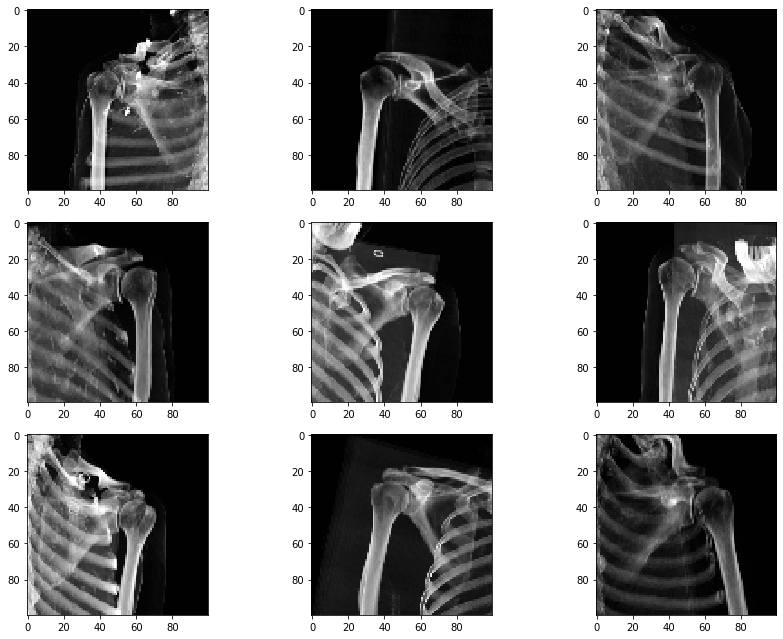

In [212]:
shoulderrepo = originalrepo[np.asarray(target) == 2]
symbols_visualise = random.sample(range(len(shoulderrepo)), 9)
fig,axes = plt.subplots(3,3, figsize=[12,9])
fig.tight_layout() # increase the distance between subplots
for i, dat in enumerate(axes.flatten()):
    if i<len(symbols_visualise): # This "if" is included to prevent the programme from crashing due to a lack of data to plot if the user requests more subplots than data.
        dat.imshow(np.asarray(shoulderrepo[symbols_visualise[i]]).reshape(100,100), 
                   cmap='gray', interpolation='nearest')
print('Shoulder Images')
plt.show()

## Part 2 - Validation Experiments
(Moreno-Garcia 2022)

### Stratified Split

To begin, we'll need a stratified split to set aside 30% of the sample for testing and 70% for training. This will be done for each of the three dataset versions (original, binarised and hog)

In [213]:
originaldata_train, originaldata_test, targetoriginaldata_train, targetoriginaldata_test = train_test_split(originalrepo, 
                                                                          target, test_size=0.3, 
                                                                          random_state=42, stratify=target)


hogdata_train, hogdata_test, targethogdata_train, targethogdata_test = train_test_split(hogrepo, 
                                                                          target, test_size=0.3, 
                                                                          random_state=42, stratify=target)

The training datasets now each have 3031 samples, while the testing sets each have 1300 samples.

In [214]:
print(originaldata_train.shape[0])
print(originaldata_test.shape[0])

3031
1300


We can see that, because we stratified using the same target, all new objectives for the two datasets are the same

In [215]:
print(targetoriginaldata_train == targethogdata_train)
print(targetoriginaldata_test == targethogdata_test)

True
True


####  We can also plot the new class distribution for the train and test sets to verify if they all contain a representative portion of the data In comparison to the original set,

Training dataset class distribution


Calculating class distribution for the training set...
   Class  Number of Samples
0      0               1656
1      1                787
2      2                588
Total images: 3031

Showing class distribution bar chart for the training set...


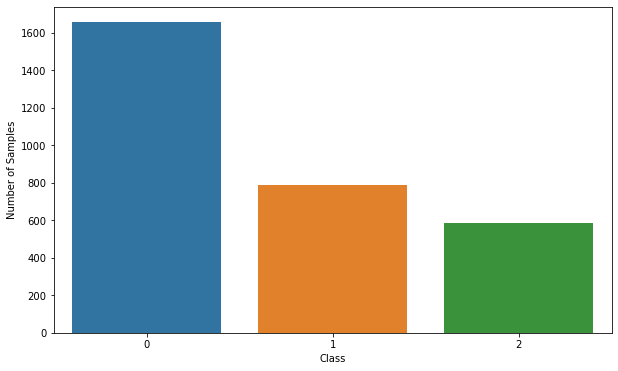

In [216]:
print('\nCalculating class distribution for the training set...')
histo = [['Class','Number of Samples']]
for i, label1 in enumerate(sorted(list(set(targetoriginaldata_train)))):
    cont = 0
    for j, label2 in enumerate(targetoriginaldata_train):
        if label1 == label2:
            cont+=1
    histo.append([label1,cont])
histo.append(['Total Samples', len(targetoriginaldata_train)])
## As a.csv file, save the histogram
with open('classdistribution_train.csv', 'w', newline='', encoding='utf-8') as csvfile:
    filewriter = csv.writer(csvfile, delimiter=',')
    for i, hist in enumerate(histo):
        filewriter.writerow(hist)
## Load as a panda
histo_panda = pd.DataFrame.from_records(histo[1:-1], columns=histo[0])
print(histo_panda)
print('Total images: '+str(len(targetoriginaldata_train)))
## Using seaborn, create a histogram
sns_plot = sns.barplot(y="Number of Samples", x="Class", data=histo_panda)
## Save the image
sns_plot.figure.set_size_inches(10,6)
sns_plot.figure.savefig('barchart_train.jpg', orientation = 'landscape', dpi = 600, transparent=True)
print('\nShowing class distribution bar chart for the training set...')
plt.show()

#### Testing dataset class distribution


Calculating class distribution for the test set...
   Class  Number of Samples
0      0                710
1      1                337
2      2                253
Total images: 1300

Showing class distribution bar chart for the test set...


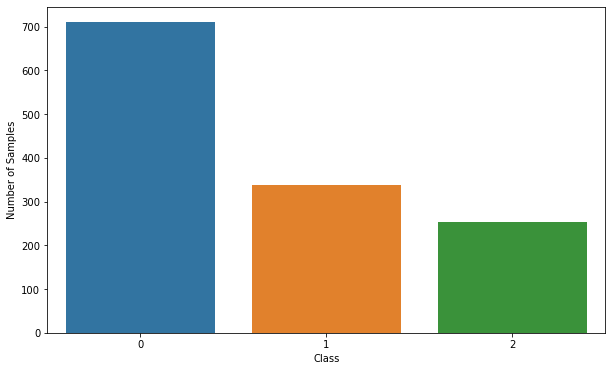

In [217]:
print('\nCalculating class distribution for the test set...')
histo = [['Class','Number of Samples']]
for i, label1 in enumerate(sorted(list(set(targetoriginaldata_test)))):
    cont = 0
    for j, label2 in enumerate(targetoriginaldata_test):
        if label1 == label2:
            cont+=1
    histo.append([label1,cont])
histo.append(['Total Samples', len(targetoriginaldata_test)])
##  As a.csv file, save the histogram.   
with open('classdistribution_test.csv', 'w', newline='', encoding='utf-8') as csvfile:
    filewriter = csv.writer(csvfile, delimiter=',')
    for i, hist in enumerate(histo):
        filewriter.writerow(hist)
## Load as a panda
histo_panda = pd.DataFrame.from_records(histo[1:-1], columns=histo[0])
print(histo_panda)
print('Total images: '+str(len(targetoriginaldata_test)))
## Using seaborn, create a histogram
sns_plot = sns.barplot(y="Number of Samples", x="Class", data=histo_panda)
## Save the image
sns_plot.figure.set_size_inches(10,6)
sns_plot.figure.savefig('barchart_test.jpg', orientation = 'landscape', dpi = 600, transparent=True)
print('\nShowing class distribution bar chart for the test set...')
plt.show()


### Random Oversampling

Implementing Random OverSampling (ROS) to augment the HOG dataset's train portion and balance the classes to 1656 each. This new dataset contains a total of 4968 images. (Moreno-Garcia 2022)

1. Use Random Oversampling to calculate a new dataset

In [218]:
!pip install imblearn

In [219]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
hogrepo_ros, target_ros = ros.fit_resample(hogdata_train,targethogdata_train)

2. Calculate the distribution following ROS


Calculating class distribution (after ROS)...
   Class  Number of Samples
0      0               1656
1      1               1656
2      2               1656
Total images: 4968

Showing class distribution bar chart (after ROS)...


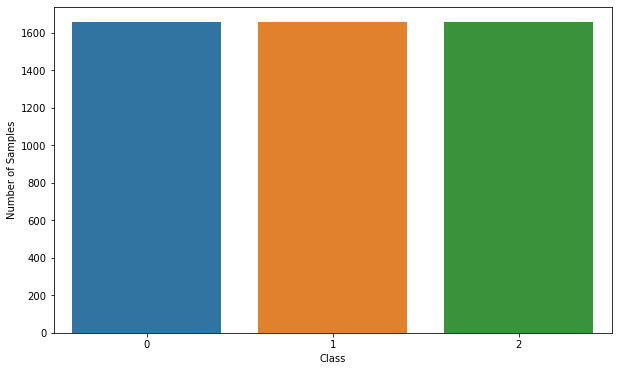

Size of ROS augmented target:  4968
Size of ROS augmented repository:  (4968, 1800)
Example of the ROS augmented repository: 
[[0.49200324 0.12837059 0.04382023 ... 0.         0.52290164 0.60273289]
 [0.30653338 0.10220482 0.30653338 ... 0.36426887 0.36426887 0.36426887]
 [0.29307518 0.31029975 0.31029975 ... 0.12630755 0.50836859 0.50836859]
 ...
 [0.47205174 0.24149526 0.10909701 ... 0.441731   0.33510245 0.441731  ]
 [0.37634664 0.37634664 0.17181117 ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.0597113  0.05498195 0.05010763]]


In [220]:
print('\nCalculating class distribution (after ROS)...')
histo = [['Class','Number of Samples']]
for i, label1 in enumerate(sorted(list(set(target_ros)))):
    cont = 0
    for j, label2 in enumerate(target_ros):
        if label1 == label2:
            cont+=1
    histo.append([label1,cont])
histo.append(['Total Samples', len(target_ros)])
## As a .csv file, save histogram   
with open('classdistribution_ros.csv', 'w', newline='', encoding='utf-8') as csvfile:
    filewriter = csv.writer(csvfile, delimiter=',')
    for i, hist in enumerate(histo):
        filewriter.writerow(hist)
## Convert histogram into a panda dataframe
histo_panda = pd.DataFrame.from_records(histo[1:-1], columns=histo[0])
print(histo_panda)
print('Total images: '+str(len(target_ros)))
## Using seaborn, create a histogram
sns_plot = sns.barplot(y="Number of Samples", x="Class", data=histo_panda)
## Save the image
sns_plot.figure.set_size_inches(10,6)
sns_plot.figure.savefig('barchart_ros.jpg', orientation = 'landscape', dpi = 600, transparent=True)
print('\nShowing class distribution bar chart (after ROS)...')
plt.show()

print('Size of ROS augmented target: ', len(target_ros))
print('Size of ROS augmented repository: ', hogrepo_ros.shape)
print('Example of the ROS augmented repository: ')
print(hogrepo_ros)

3. As a CSV file,save the ROS Dataset

In [221]:
print('\nSaving dataset as .csv file...')   

with open('hog_ros.csv', 'w', newline='', encoding='utf-8') as csvfile:
    filewriter = csv.writer(csvfile, delimiter=',')
    for i, h in enumerate(hogrepo_ros):
        row = np.concatenate((h,[target_ros[i]]))
        filewriter.writerow(row)
        
print('\nData saved!')  


Saving dataset as .csv file...

Data saved!


## Experiment 1: Applying CNN to Stratified Dataset

(Elyan 2022)

In [222]:
#Using Keras backend
import os
os.environ['KERAS_BACKEND'] = 'tensorflow'

#### Import the required packages

In [223]:
#Load libraries and modules.
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import np_utils

In [224]:
#Create a random seed (for reproducibility)
np.random.seed(123)

 Pre-processing of input data

In [225]:
# Reshape into a four-dimensional shape
originaldata_train_reshape = originaldata_train.reshape(originaldata_train.shape[0], 100, 100, 1)
originaldata_test_reshape = originaldata_test.reshape(originaldata_test.shape[0], 100, 100, 1)
# Convert to float 32
originaldata_train_reshape = originaldata_train_reshape.astype('float32')
originaldata_test_reshape = originaldata_test_reshape.astype('float32')
# normalise
originaldata_train_reshape /= 255 
originaldata_test_reshape /= 255

Loading libraries and modules and creating a neural net

In [226]:

import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D


model = Sequential()
 
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(100,100,1)))
model.add(Conv2D(32, (3, 3), activation='relu')) 
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))
from keras.utils import np_utils

Pre processing class labels

In [227]:

targetoriginaldata_train_categorical = np_utils.to_categorical(targetoriginaldata_train, 3)
targetoriginaldata_test_categorical = np_utils.to_categorical(targetoriginaldata_test, 3)

In [228]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 98, 98, 32)        320       
                                                                 
 conv2d_16 (Conv2D)          (None, 96, 96, 32)        9248      
                                                                 
 conv2d_17 (Conv2D)          (None, 94, 94, 32)        9248      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 47, 47, 32)       0         
 2D)                                                             
                                                                 
 dropout_10 (Dropout)        (None, 47, 47, 32)        0         
                                                                 
 flatten_5 (Flatten)         (None, 70688)             0         
                                                      

Compile the model

In [229]:

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [230]:

n=len(originaldata_test)



Fit the model to training data

In [231]:

model.fit(originaldata_train_reshape[:n], targetoriginaldata_train_categorical[:n], 
          batch_size=32, epochs=5, verbose=1) # verbose = 1 allows you to see the training log for each iteration, while higher values only provide a summary

Epoch 1/5
41/41 [==============================] - 18s 415ms/step - loss: 0.6357 - accuracy: 0.7592
Epoch 2/5
41/41 [==============================] - 17s 411ms/step - loss: 0.0517 - accuracy: 0.9854
Epoch 3/5
41/41 [==============================] - 17s 414ms/step - loss: 0.0247 - accuracy: 0.9946
Epoch 4/5
41/41 [==============================] - 17s 413ms/step - loss: 0.0204 - accuracy: 0.9946
Epoch 5/5
41/41 [==============================] - 17s 409ms/step - loss: 0.0222 - accuracy: 0.9946


Evaluate the model on test data

In [232]:

loss, accuracy = model.evaluate(originaldata_test_reshape[:n], targetoriginaldata_test_categorical[:n], verbose=0)
print('Loss: ', loss,'\nAcc: ', accuracy)

Loss:  0.013156702741980553 
Acc:  0.9953846335411072


Examine the labels that were predicted

In [233]:

predict_x=model.predict(originaldata_test_reshape[:n]) 
predict_x

array([[1.3162161e-04, 9.9986839e-01, 2.7536748e-10],
       [6.6868602e-06, 9.9999332e-01, 2.8919313e-12],
       [1.4414773e-05, 9.9998558e-01, 5.1725652e-11],
       ...,
       [9.6982800e-10, 7.2854240e-12, 1.0000000e+00],
       [4.3839214e-06, 9.9999559e-01, 3.6752229e-12],
       [5.0234848e-06, 9.9999499e-01, 1.1826513e-13]], dtype=float32)

In [234]:
classes_x=np.argmax(predict_x,axis=1)
print(classes_x)

[1 1 1 ... 2 1 1]


Confusion matrix

In [235]:

from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(classes_x,targetoriginaldata_test)
conf_mat

array([[705,   1,   0],
       [  5, 336,   0],
       [  0,   0, 253]], dtype=int64)

Plotting the confusion matrix

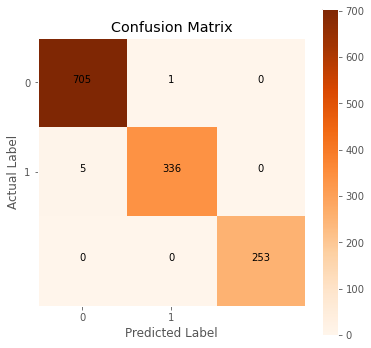

In [236]:

import itertools 
with plt.style.context(('ggplot')):
    fig = plt.figure(figsize=(6,6), num=1)
    plt.imshow(conf_mat, interpolation='nearest',cmap= plt.cm.Oranges )
    plt.xticks([0,1],[0,1])
    plt.yticks([0,1],[0,1])
    plt.xlabel('Predicted Label')
    plt.ylabel('Actual Label')
    for i, j in itertools.product(range(conf_mat.shape[0]), range(conf_mat.shape[1])):
                plt.text(j, i,conf_mat[i, j], horizontalalignment="center",color="black")
    plt.grid(None)
    plt.title('Confusion Matrix')
    plt.colorbar();

From the confusion matrix we can see that 

•	4 instances of class ‘0’ i.e. ‘chest’ were misclassified as class ’1’ i.e. ‘knee’ 

•	2 instances of class ‘1’ i.e. ‘knee’ were misclassified as class ’0’ i.e. ‘chest’ 

•	ALl instnaces of classs '2' i.e. shoulder we correctly classified

A total of 6 misclassifications.

In [237]:
print(type(targetoriginaldata_test))

<class 'list'>


In [238]:
print(type(classes_x))

<class 'numpy.ndarray'>


Classification report

In [239]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(targetoriginaldata_test,classes_x,target_names = ['Chest (Class 0)','Knee (Class 1)','Shoulder (Class 1)']))

                    precision    recall  f1-score   support

   Chest (Class 0)       1.00      0.99      1.00       710
    Knee (Class 1)       0.99      1.00      0.99       337
Shoulder (Class 1)       1.00      1.00      1.00       253

          accuracy                           1.00      1300
         macro avg       0.99      1.00      1.00      1300
      weighted avg       1.00      1.00      1.00      1300



# Experiment 2: Image augmentation on original repo and applying CNN

In [240]:
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot

In [241]:
#Create a random seed (for reproducibility)
np.random.seed(123)

In [242]:
originaldata_train_reshape = originaldata_train.reshape(originaldata_train.shape[0], 100, 100, 1)
originaldata_test_reshape = originaldata_test.reshape(originaldata_test.shape[0], 100, 100, 1)

In [243]:
# convert integer to float
originaldata_train_reshape = originaldata_train_reshape.astype('float32')
originaldata_test_reshape = originaldata_test_reshape.astype('float32')

In [244]:
# defining data preparation
datagen = ImageDataGenerator(rotation_range=90,width_shift_range=0.2, height_shift_range=0.2, horizontal_flip=True,vertical_flip=True,zoom_range=0.5)

In [245]:
# fit parameters based on data
datagen.fit(originaldata_train_reshape)

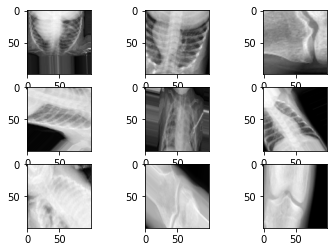

In [246]:
# set the batch size and retrieve a single batch of images
for X_batch, y_batch in datagen.flow(originaldata_train_reshape, targetoriginaldata_train, batch_size=9):
    # create a grid of 3x3 images
    for i in range(0, 9):
        pyplot.subplot(330 + 1 + i)
        pyplot.imshow(X_batch[i].reshape(100, 100), cmap=pyplot.get_cmap('gray'))
    # show the plot
    pyplot.show()
    break

load libraries and modules

In [247]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

model1 = Sequential()

model1.add(Conv2D(32, (3, 3), activation='relu', input_shape=(100,100,1)))
model1.add(Conv2D(32, (3, 3), activation='relu')) 
model1.add(Conv2D(32, (3, 3), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2,2)))
model1.add(Dropout(0.25))
model1.add(Flatten())
model1.add(Dense(128, activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(3, activation='softmax'))


Preprocessing class labels

In [248]:
from keras.utils import np_utils
targetoriginaldata_train_categorical = np_utils.to_categorical(targetoriginaldata_train, 3)
targetoriginaldata_test_categorical = np_utils.to_categorical(targetoriginaldata_test, 3)


 Compile the model

In [249]:
model1.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


Fit the model

In [250]:
model1.fit(datagen.flow(originaldata_train_reshape, targetoriginaldata_train_categorical, 
          batch_size=32), epochs=5, steps_per_epoch = originaldata_train_reshape.shape[0] // 32, verbose=1)

Epoch 1/5
94/94 [==============================] - 41s 432ms/step - loss: 17.7420 - accuracy: 0.6749
Epoch 2/5
94/94 [==============================] - 41s 438ms/step - loss: 0.5104 - accuracy: 0.8119
Epoch 3/5
94/94 [==============================] - 41s 435ms/step - loss: 0.4045 - accuracy: 0.8426
Epoch 4/5
94/94 [==============================] - 40s 428ms/step - loss: 0.4135 - accuracy: 0.8449
Epoch 5/5
94/94 [==============================] - 40s 429ms/step - loss: 0.3937 - accuracy: 0.8499


Evaluate the model

In [251]:
loss, accuracy = model1.evaluate(originaldata_test_reshape[:n], targetoriginaldata_test_categorical[:n], verbose=0)
print('Loss: ', loss,'\nAcc: ', accuracy)

Loss:  0.2638736665248871 
Acc:  0.881538450717926


Check the labels that have been predicted

In [252]:
predict_y=model1.predict(originaldata_test_reshape[:n]) 
predict_y

array([[6.5046030e-01, 2.6521552e-01, 8.4324218e-02],
       [5.7750869e-01, 4.0010279e-01, 2.2388512e-02],
       [8.3161640e-01, 1.5647580e-01, 1.1907743e-02],
       ...,
       [5.4028135e-07, 5.6722058e-11, 9.9999940e-01],
       [3.7043482e-01, 5.2427131e-01, 1.0529387e-01],
       [6.5742314e-01, 3.2200295e-01, 2.0573923e-02]], dtype=float32)

In [253]:
classes_y=np.argmax(predict_y,axis=1)
print(classes_y)

[0 0 0 ... 2 1 0]


Confusion matrix

In [254]:
from sklearn.metrics import confusion_matrix
conf_matt1=confusion_matrix(classes_y,targetoriginaldata_test)
conf_matt1


array([[696, 136,   1],
       [ 14, 198,   0],
       [  0,   3, 252]], dtype=int64)

Plotting confusion matrix

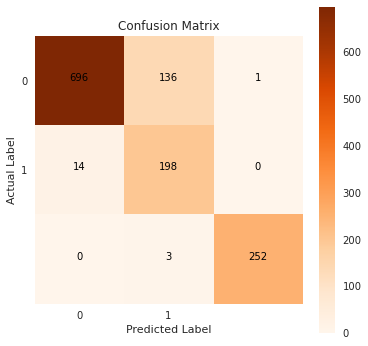

In [255]:
with plt.style.context(('ggplot', 'seaborn')):
    fig = plt.figure(figsize=(6,6), num=1)
    plt.imshow(conf_matt1, interpolation='nearest',cmap= plt.cm.Oranges)
    plt.xticks([0,1],[0,1])
    plt.yticks([0,1],[0,1])
    plt.xlabel('Predicted Label')
    plt.ylabel('Actual Label')
    for i, j in itertools.product(range(conf_matt1.shape[0]), range(conf_matt1.shape[1])):
                plt.text(j, i,conf_matt1[i, j], horizontalalignment="center",color="black")
    plt.grid(None)
    plt.title('Confusion Matrix')
    plt.colorbar();


From the confusion matrix we can see that 

•	1 instance of class ‘0’ i.e. ‘chest’ were misclassified as class ’1’ i.e. ‘knee’ 

•	 138 instances of class ‘1’ i.e. ‘knee’ were misclassified as class ’0’ i.e. ‘chest’ and 2 instances of misclassified as class ‘2’ i.e. ‘shoulder’

•	1 instance of class ‘2’ i.e. ‘shoulder’ were misclassified as class ‘0’ i.e. ‘chest’

A total of 142 misclassifications.


Classification report

In [256]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(targetoriginaldata_test,classes_y,target_names = ['Chest (Class 0)','Knee (Class 1)','Shoulder (Class 1)']))

                    precision    recall  f1-score   support

   Chest (Class 0)       0.84      0.98      0.90       710
    Knee (Class 1)       0.93      0.59      0.72       337
Shoulder (Class 1)       0.99      1.00      0.99       253

          accuracy                           0.88      1300
         macro avg       0.92      0.85      0.87      1300
      weighted avg       0.89      0.88      0.87      1300



# Part 3: Feature extraction of starting dataset, classification of the test set                        using SVM
(Moreno-Garcia 2022)

 Import required packages

In [257]:
from sklearn.svm import SVC

Now, using the training data, train an SVM model called model1 to predict the test data. Store the fitted model in a variable called mdl_svm and the prediction results in the HOG_predictedsvm variable.

In [258]:
#Create a random seed (for reproducibility)
np.random.seed(123)

In [259]:
model2 = SVC(kernel='linear')

We then need to fit our model and save the output into a new variable called mdl


In [260]:
# training the classifier
mdl_svm = model2.fit(hogdata_train,targethogdata_train)

To test our model on the test data, we will predict it

In [261]:
HOG_predictedsvm = model2.predict(hogdata_test)
print(HOG_predictedsvm,HOG_predictedsvm.shape) 

[1 1 1 ... 2 1 1] (1300,)


Now we can compare the model's accuracy of the obtained labels

In [262]:
# Print model's accuracy
comparison = HOG_predictedsvm == targethogdata_test
print('Accuracy', sum(comparison)/len(comparison))


Accuracy 1.0


In [263]:
print(type(targethogdata_test))

<class 'list'>


In [264]:
print(type(HOG_predictedsvm))

<class 'numpy.ndarray'>


In [265]:
# Converting targethogdata_test to numpy array so it matches HOG_predicted
targethogdata_test = np.array(targethogdata_test)

Print the accuracy

In [266]:
# Print the accuracy for each class
## We use the numpy.where() function to find where a vector has a certain value i.e. 0/1/2
print('Chest Acc',sum(targethogdata_test[np.where(targethogdata_test==0)]==HOG_predictedsvm[np.where(targethogdata_test==0)])/len(targethogdata_test[np.where(targethogdata_test==0)]))
print('Knee Acc',sum(targethogdata_test[np.where(targethogdata_test==1)]==HOG_predictedsvm[np.where(targethogdata_test==1)])/len(targethogdata_test[np.where(targethogdata_test==1)]))
print('Shoulder Acc',sum(targethogdata_test[np.where(targethogdata_test==2)]==HOG_predictedsvm[np.where(targethogdata_test==2)])/len(targethogdata_test[np.where(targethogdata_test==2)]))

Chest Acc 1.0
Knee Acc 1.0
Shoulder Acc 1.0


Confusion Matrix

In [267]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
conf_matt2=confusion_matrix(HOG_predictedsvm,targethogdata_test)
conf_matt2

array([[710,   0,   0],
       [  0, 337,   0],
       [  0,   0, 253]], dtype=int64)

Plot the confusion matrix

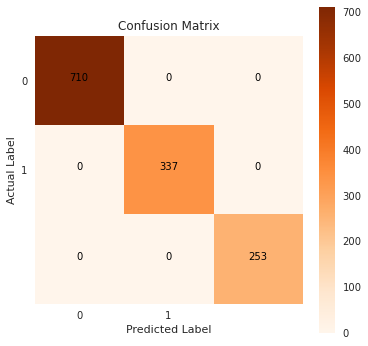

In [268]:
with plt.style.context(('ggplot', 'seaborn')):
    fig = plt.figure(figsize=(6,6), num=1)
    plt.imshow(conf_matt2, interpolation='nearest',cmap= plt.cm.Oranges)
    plt.xticks([0,1],[0,1])
    plt.yticks([0,1],[0,1])
    plt.xlabel('Predicted Label')
    plt.ylabel('Actual Label')
    for i, j in itertools.product(range(conf_matt2.shape[0]), range(conf_matt2.shape[1])):
                plt.text(j, i,conf_matt2[i, j], horizontalalignment="center",color="black")
    plt.grid(None)
    plt.title('Confusion Matrix')
    plt.colorbar();

We can see above from the confusion matrix that all the instances of the three classes have been correctly classified.

Classification report with precision and recall

In [269]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(targethogdata_test,HOG_predictedsvm,target_names = ['Chest (Class 0)','Knee (Class 1)','Shoulder (Class 1)']))

                    precision    recall  f1-score   support

   Chest (Class 0)       1.00      1.00      1.00       710
    Knee (Class 1)       1.00      1.00      1.00       337
Shoulder (Class 1)       1.00      1.00      1.00       253

          accuracy                           1.00      1300
         macro avg       1.00      1.00      1.00      1300
      weighted avg       1.00      1.00      1.00      1300



# Part 4: Feature extraction of starting dataset, data balancing of the training set(ROS), classification using SVM

(Moreno-Garcia 2022)

In [270]:
#Create a random seed (for reproducibility)
np.random.seed(123)

In [271]:
model3 = SVC(kernel='linear')

Fit the model

In [272]:
mdl1 = model3.fit(hogrepo_ros,target_ros)

Prdeicting on the model

In [273]:
HOG_predicted1 = model3.predict(hogdata_test)
print(HOG_predicted1,HOG_predicted1.shape)

[1 1 1 ... 2 1 1] (1300,)


Calculate accuracy

In [274]:
comparison = HOG_predicted1 == targethogdata_test
print('Accuracy', sum(comparison)/len(comparison))

Accuracy 1.0


In [275]:
# Print the accuracy for each class
## We use the numpy.where() function to find where a vector has a certain value i.e. 0/1/2
print('Chest Acc',sum(targethogdata_test[np.where(targethogdata_test==0)]==HOG_predicted1[np.where(targethogdata_test==0)])/len(targethogdata_test[np.where(targethogdata_test==0)]))
print('Knee Acc',sum(targethogdata_test[np.where(targethogdata_test==1)]==HOG_predicted1[np.where(targethogdata_test==1)])/len(targethogdata_test[np.where(targethogdata_test==1)]))
print('Shoulder Acc',sum(targethogdata_test[np.where(targethogdata_test==2)]==HOG_predicted1[np.where(targethogdata_test==2)])/len(targethogdata_test[np.where(targethogdata_test==2)]))

Chest Acc 1.0
Knee Acc 1.0
Shoulder Acc 1.0


Confusion matrix

In [276]:
from sklearn.metrics import confusion_matrix
conf_matt3=confusion_matrix(HOG_predicted1,targethogdata_test)
conf_matt3

array([[710,   0,   0],
       [  0, 337,   0],
       [  0,   0, 253]], dtype=int64)

Plot  the confusion matrix

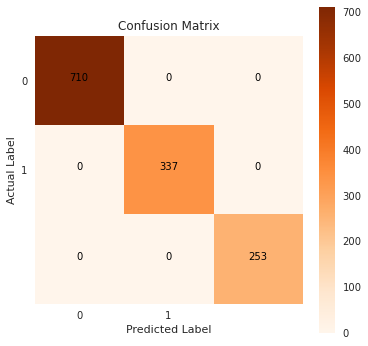

In [277]:
with plt.style.context(('ggplot', 'seaborn')):
    fig = plt.figure(figsize=(6,6), num=1)
    plt.imshow(conf_matt3, interpolation='nearest',cmap= plt.cm.Oranges)
    plt.xticks([0,1],[0,1])
    plt.yticks([0,1],[0,1])
    plt.xlabel('Predicted Label')
    plt.ylabel('Actual Label')
    for i, j in itertools.product(range(conf_matt3.shape[0]), range(conf_matt3.shape[1])):
                plt.text(j, i,conf_matt3[i, j], horizontalalignment="center",color="black")
    plt.grid(None)
    plt.title('Confusion Matrix')
    plt.colorbar();

We can see above from the confusion matrix that all the instances of the three classes have been correctly classified.

Classification report with precision and recall

In [278]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(targethogdata_test,HOG_predicted1,target_names = ['Chest (Class 0)','Knee (Class 1)','Shoulder (Class 1)']))

                    precision    recall  f1-score   support

   Chest (Class 0)       1.00      1.00      1.00       710
    Knee (Class 1)       1.00      1.00      1.00       337
Shoulder (Class 1)       1.00      1.00      1.00       253

          accuracy                           1.00      1300
         macro avg       1.00      1.00      1.00      1300
      weighted avg       1.00      1.00      1.00      1300



## Discussion:

Choice of models explained: CNN has been used in experiments 1 & 2, whereas SVM has been used in experiments 3 & 4 beacause we are using features as data and CNN do not perform well on features.

Accuracy is used as a metric to compare the performance of the models in the experiments above.Below are the values that were obtained in each:

Experiment 1: 0.99

Experiment 2: 0.89

Experiment 3: 1

Experiment 4: 1

From the confusion matrices we see a similarity in all the four models, that the most preferred class is class '2' i.e.shoulder because the instances of this class have been mostly correctly classifed and has the least number of misclassifications compared to the oher two.

Overall performance evalution explained: The data that is being used in experiments 1 and 2 is complex in nature compared to the data in experiments 3 & 4 where we only use features. We may say that SVM has been given a simpler task and gives better results and accuracy whereas, CNN gives comparitively worse results.  We also see a tradeoff in experiment 3 and 4 in terms of performance with both models giving a good and same accuracy of 1. However, in experiment 2 we notice that using image augmentation to balance the training data impacts on the accuracy. Had there been more time and resources, I could have experimented more with the parameters in experiment 2 to achieve better performance.


# References

Moreno-Garcia, C., 2022. Coursework part 2 model solution. [online tutorial]. Advanced Data Science. Robert Gordon University. School of computing Science and Digital Media, 12th  April. Available from: http://localhost:8888/notebooks/Desktop/MSc/Semester%202/Advanced%20Data%20Science%20-%20CMM536/CMM536_CWP1partofP2_ModelSolution.ipynb [Accessed 15/04/2022].

Elyan, Prof E., 2022. CNN and Transfor Learning. [online lecture]. Advanced Data Science. Robert Gordon University. School of Computing Science and Digital Media, 22nd March. Available from: https://campusmoodle.rgu.ac.uk/pluginfile.php/5826832/mod_resource/content/2/Lab05.pdf [Accessed 16/04/2022].

Moreno-Garcia, C., 2022. Feature Extraction. [online tutorial]. Advanced Data Science. Robert Gordon University. School of Computing Science and Digital Media, 17th February. Available from: http://localhost:8888/notebooks/Desktop/MSc/Semester%202/Advanced%20Data%20Science%20-%20CMM536/Week4/Lab/CMM536_T4_Lab_Solved.ipynb [Accessed 16/04/2022].


# Bibliography

https://docs.python.org/3/tutorial/controlflow.html

https://app.datacamp.com/learn/courses/image-processing-in-python

https://towardsdatascience.com/support-vector-machine-python-example-d67d9b63f1c8

https://machinelearningmastery.com/image-augmentation-deep-learning-keras/

https://www.analyticsvidhya.com/blog/2020/08/image-augmentation-on-the-fly-using-keras-imagedatagenerator/